In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd()) 

C:\Users\matze\Documents\Winton\CRISPDM


In [3]:
X = pd.read_csv('X_features.csv', index_col=0)
y = pd.read_csv('y_features.csv', index_col=0)
groups = X.pop('Feature_7')

In [4]:
test = pd.read_csv('test_features.csv', index_col=0).drop(columns = 'Feature_7')

In [5]:
X.shape
test.head()

,Feature_2,Feature_3,Feature_4,Feature_6,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,...,PR_120,PR_Last_5,PR_Last_10,PR_Last_30,PR_Last_60,Ranked_7_PR_120,Ranked_7_PR_Last_10,Ranked_7_PR_Last_30,Ranked_7_PR_Last_5,Ranked_7_PR_Last_60
Id,,,,,,,,,,,,,,,,,,,,,
1,1.412783,-0.056284,0.407434,0.413226,0.2138,11.0,-0.229910,0.97,8.0,1.683134,...,0.001771,0.000047,-0.004073,0.002213,0.009159,16.0,13.0,20.0,18.0,24.0
2,-0.112675,0.907973,1.002425,-0.257825,0.2138,13.0,-0.971909,0.93,4.0,1.395301,...,-0.004190,0.000451,-0.000032,0.000807,-0.003849,14.0,21.0,30.0,24.0,9.0
3,-0.607583,1.076668,0.517865,0.947340,0.0105,10.0,-1.096276,0.88,4.0,1.722474,...,0.002061,0.000883,0.001056,0.000909,-0.001187,31.0,26.0,28.0,29.0,23.0
4,2.230240,0.223222,0.407434,0.439345,0.3318,13.0,-0.509942,0.76,5.0,1.805385,...,0.001485,-0.000135,-0.002296,0.002262,0.004591,45.0,17.0,32.0,18.0,40.0
5,0.360399,0.597896,-0.145497,0.275744,0.0099,8.0,-1.188949,0.64,4.0,1.528518,...,0.002342,-0.000275,-0.000508,0.001437,0.001861,29.0,15.0,26.0,7.0,24.0


In [6]:
weights = pd.read_csv('weights.csv', index_col=0)
weights.tail()

,Weight_Daily,Weight_Intraday
Id,,
39996,1.767363e+06,1.413891e+06
39997,1.836248e+06,1.468998e+06
39998,2.266030e+06,1.812824e+06
39999,1.884897e+06,1.507918e+06
40000,1.919237e+06,1.535389e+06


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
pipe =make_pipeline(StandardScaler(), Ridge())
cross_val_score(lasso, pipe, y.Ret_121, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
#param_grid = {'alpha': [100]}
#grid_pipe = GridSearchCV(pipe,param_grid, cv=5)
#grid_pipe.fit(X, y.Ret_PlusOne)

NameError: name 'cross_val_score' is not defined

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit

In [9]:
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.2, train_size=0.2, random_state=0)
group_shuffle.split(X, groups=groups)

<generator object BaseShuffleSplit.split at 0x0000019827F72468>

In [ ]:
from sklearn.linear_model import Lasso
lasso= Lasso(normalize =True)
winton_cv = cross_val_score(lasso, X, y.Ret_121, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))
#print('Benchmark: {}'.format(test_score_minutes))

In [ ]:
low_cut = y.Ret_PlusOne.std()*-5
high_cut = y.Ret_PlusOne.std()*5
#y_train.Ret_PlusOne.plot()
from sklearn.preprocessing import FunctionTransformer
#logger = FunctionTransformer(np.clip( low_cut, high_cut))
#logger.transform(y.Ret_PlusOne.values.reshape(-1,1))

from sklearn.base import TransformerMixin
class ClipTransformer(TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xclip = X.clip(low_cut,high_cut)
        return Xclip
clip = ClipTransformer()
    
clip.transform(y.Ret_PlusOne)

#np.clip(y.Ret_PlusOne, -10,10)

In [ ]:


lasso= Lasso(alpha= 0.1100)
winton_cv = cross_val_score(lasso, X, y.Ret_PlusOne, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))
#print('Benchmark: {}'.format(test_score_minutes))


Score: [-0.00058496 -0.00059649 -0.00064963 -0.00056113 -0.00057216 -0.00074801
 -0.00060069 -0.00067211 -0.0005735  -0.00052046]
Score Mean: -0.0006079147761024154
Score Max: -0.0005204633439076678 Score Min: -0.0007480140423706209
Benchmark: 0.000633153376356546

In [ ]:
from sklearn.svm import SVR
clf = SVR(C=1, epsilon=0.1)
winton_cv = cross_val_score(clf, X, y.Ret_PlusOne, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))
#print('Benchmark: {}'.format(test_score_minutes))

In [ ]:
from sklearn.svm import NuSVR
clf = NuSVR(C=1.0, nu=0.1)
winton_cv = cross_val_score(clf, X, y.Ret_PlusOne, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))

In [ ]:
from sklearn.svm import NuSVR
clf = NuSVR(C=1.0, nu=0.1)
winton_cv = cross_val_score(clf, X, y.Ret_121, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))

In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.3, l1_ratio=0.7)
winton_cv = cross_val_score(enet, X, y.Ret_PlusOne, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))
#print('Benchmark: {}'.format(test_score_minutes))

In [ ]:

from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(n_estimators=20)
winton_cv = cross_val_score(clf, X, y.Ret_121, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))
#print('Benchmark: {}'.format(test_score_minutes))

In [ ]:
from sklearn.linear_model import BayesianRidge
gnb = BayesianRidge()
winton_cv = cross_val_score(gnb, X, y.Ret_121, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))
#print('Benchmark: {}'.format(test_score_minutes))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators= 20, random_state=0)
winton_cv = cross_val_score(gbr, X, y.Direction_Next_60, groups, cv=group_shuffle,scoring='accuracy')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))
#print('Benchmark: {}'.format(test_score_minutes))

### Group Shuffle

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators= 20, random_state=0)
winton_cv = cross_val_score(gbr, X, y.Ret_PlusOne, groups, cv=group_shuffle,scoring='neg_mean_absolute_error')

In [ ]:
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))

test 0.7 train 0.3
Score: [-0.01591832 -0.01567363 -0.01591501 -0.01618196 -0.01599138 -0.0161168
 -0.01593566 -0.01579899 -0.01611669 -0.01613118]
Score Mean: -0.015977961693977548
Score Max: -0.01567363443532113 Score Min: -0.016181960496505998

test 0.6 train 0.4
Score: [-0.01583886 -0.01589802 -0.01591669 -0.01613863 -0.01611396 -0.01620459
 -0.01596755 -0.0155535  -0.01569381 -0.01601187]
Score Mean: -0.01593374792622195
Score Max: -0.015553501263109323 Score Min: -0.01620459173989366

### kfold

wenn ich statt 10 fold nur 5 nehme dann bleinbt die durschnittliche score in etwa gleich aber die spannweite sinkt von [0.014,0.016] auf [0.0152,0.0157

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle = True, random_state=0)
winton_cv = cross_val_score(gbr, X, y.Ret_PlusOne, groups, cv=kfold ,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))

### Kfold grouped
hier veändert die reduzierung auf cv=5 5 nicht so viel

*10 Folds*
Score: [-0.01396117 -0.01490393 -0.01724438 -0.01528725 -0.01502124 -0.01609003
 -0.0161716  -0.01934954 -0.01526929 -0.01673759]
 
Score Mean: -0.01600360120812829

Score Max: -0.013961167601559708 Score Min: -0.019349538456297118

*5 Folds*
Score: [-0.01494679 -0.01472441 -0.0170311  -0.01608347 -0.01646454]

Score Mean: -0.01585006137866703

Score Max: -0.014724410328707376 Score Min: -0.017031103117161335


*Mit Feature_7*

Score: [-0.01396159 -0.01485204 -0.01723355 -0.01528067 -0.01500237 -0.01609386
 -0.0162106  -0.0191153  -0.01524598 -0.01674708]
 
Score Mean: -0.015974304047517717

Score Max: -0.013961588429848267 Score Min: -0.019115295397782325


*5Folds*
Score: [-0.01493908 -0.01468893 -0.01710154 -0.01607871 -0.01646973]

Score Mean: -0.01585559818521053

Score Max: -0.014688932535955603 Score Min: -0.017101541552033254


kfold 5 bedeutet das wir mehr verschiedene zeitpunkte vorhersagen müssen was nciht schlecht ist evtl mal noch 3 probieren

In [ ]:
from sklearn.model_selection import GroupKFold
groupedkfold = GroupKFold(n_splits=5)
winton_cv = cross_val_score(gbr, pd.concat([X,groups], axis=1), y.Ret_PlusOne, groups, cv=groupedkfold,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))


Score: [-0.01396117 -0.01490393 -0.01724438 -0.01528725 -0.01502124 -0.01609003
 -0.0161716  -0.01934954 -0.01526929 -0.01673759]
Score Mean: -0.01600360120812829
Score Max: -0.013961167601559708 Score Min: -0.019349538456297118

## Kfold sorted Data

es macht nur minimal unterschied ob die werte nach Feature_/ sortier sind oder nicht

sortieren der werte und vorallem auch von y macht anscheinend doch ein bisschen sinn

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle = True, random_state=0)
winton_cv = cross_val_score(gbr, pd.concat([X,groups], axis=1).sort_values('Feature_7'), pd.concat([y.Ret_PlusOne,groups], axis=1).sort_values('Feature_7').drop(columns='Feature_7').values.reshape(-1,1), groups, cv=kfold ,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))



In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle = False, random_state=0)
winton_cv = cross_val_score(gbr, pd.concat([X,groups], axis=1).sort_values('Feature_7'), pd.concat([y.Ret_PlusOne,groups], axis=1).sort_values('Feature_7').drop(columns='Feature_7'), groups, cv=kfold ,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))


In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10,shuffle = True, random_state=0)
winton_cv = cross_val_score(lasso, pd.concat([X,groups], axis=1).sort_values('Feature_7'), pd.concat([y.Ret_PlusOne,groups], axis=1).sort_values('Feature_7').drop(columns='Feature_7').values.reshape(-1,1).ravel(), groups, cv=kfold ,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle = False, random_state=0)
winton_cv = cross_val_score(gbr, pd.concat([X,groups], axis=1).drop('Feature_7'.sort_values('Feature_7'), y.Ret_PlusOne, groups, cv=kfold ,scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))

## Cross Validate

für das spätere liederboard haben wir jeweils zeitpunkte die nicht in den trainingsdaten enthalten sind und sich auch nicht überlappen daher nehmen wir eine gruppierte methode zu cross validation

eine ist die shuffle bei der wir eine größere testmenge als trainingsmenge testen können um so so ähnlich wie möglich die realsituation abbilden zu können und außerdem recheneffizienter arbeiten können weil wir nicht alle daten benutzen müssen

ansonsten noch kfold(shuffelede false) mit 10 folds und sortierten daten

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

In [ ]:
#RobustScaler
clf = make_pipeline(RobustScaler(), Lasso(alpha=0.1))
winton_cv = cross_val_score(clf, X,y.Ret_121 , cv=group_shuffle, groups = groups, scoring='neg_mean_absolute_error')
print('Score: {}'.format(winton_cv))
print('Score Mean: {}'.format(winton_cv.mean()))
print('Score Max: {}'.format(winton_cv.max()), 'Score Min: {}'.format(winton_cv.min()))

# Model Tuning

## Make Scorer

In [13]:
from sklearn.metrics import make_scorer
def mean_absolute_error(y_prob, y_actual):
    weight= weights.Weight_Daily.loc[X.index]
    return abs(y_prob -y_actual).mean()
    
mae = make_scorer(mean_absolute_error)

## Ret_PlusOne

### grouped shuffle split

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)


In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid= {'alpha': [10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700, 1000, 2000]}
gs= GridSearchCV(lasso, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X, y.Ret_PlusOne, groups)
gs.cv_results_ 
gs.best_estimator_
gs.best_score_ 

KeyboardInterrupt: 

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid= {'alpha': [10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700, 1000, 2000]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X, y.Ret_PlusOne, groups)
gs.cv_results_ 
print(gs.best_estimator_)
print(gs.best_score_)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=None, solver='auto', tol=0.001)
-0.015838488197292076


In [ ]:
#(C, epsilon, and, assuming you use an RBF kernel function, gamma) ‘poly’, ‘rbf’,
from sklearn.svm import NuSVR
nusvr = NuSVR()
#param_grid= {'gamma': [0.01, 1, 10],'C':[0.01, 1, 10],'kernel':['poly', 'rbf']}
param_grid= {'gamma': [0.01],'C':[0.01, 1],'kernel':['rbf']}
gssvr= GridSearchCV(nusvr, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gssvr.fit(X, y.Ret_PlusOne, groups)
gssvr.cv_results_ 
print(gs.best_estimator_)
print(gs.best_score_)

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
#param_grid= {'min_samples_leaf ': [3, 5, 10],'max_depth ':[3, 4, 7],'loss':['huber', 'ls']}
param_grid= {'random_state': [0],'n_estimators': [6,5],'loss':['ls'],'max_depth':[2,1],
             'max_features':['sqrt'],
             'min_samples_leaf':[3,2,1],
             'min_samples_split':[20],
             'verbose':[1]}
gs= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X, y.Ret_PlusTwo, groups)
gs.cv_results_ 
print(gs.best_estimator_)
print(gs.best_score_)

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.07s
         2           0.0006            0.05s
         3           0.0006            0.04s
         4           0.0006            0.02s
         5           0.0006            0.01s
         6           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.06s
         2           0.0006            0.05s
         3           0.0006            0.04s
         4           0.0006            0.02s
         5           0.0006            0.01s
         6           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.06s
         2           0.0006            0.05s
         3           0.0006            0.03s
         4           0.0006            0.02s
         5           0.0006            0.01s
         6           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
      

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.05s
         2           0.0006            0.05s
         3           0.0006            0.03s
         4           0.0006            0.02s
         5           0.0006            0.01s
         6           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.07s
         2           0.0006            0.06s
         3           0.0006            0.04s
         4           0.0006            0.02s
         5           0.0006            0.01s
         6           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.05s
         2           0.0006            0.04s
         3           0.0006            0.02s
         4           0.0006            0.01s
         5           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.07s
      

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.05s
         2           0.0006            0.04s
         3           0.0006            0.02s
         4           0.0006            0.01s
         5           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.05s
         2           0.0006            0.04s
         3           0.0006            0.03s
         4           0.0006            0.01s
         5           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.05s
         2           0.0006            0.04s
         3           0.0006            0.02s
         4           0.0006            0.01s
         5           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.03s
         2           0.0006            0.02s
         3           0.0006            0.02s
      

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.04s
         2           0.0005            0.03s
         3           0.0005            0.02s
         4           0.0005            0.01s
         5           0.0005            0.01s
         6           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0007            0.03s
         2           0.0006            0.02s
         3           0.0006            0.02s
         4           0.0006            0.01s
         5           0.0006            0.01s
         6           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.04s
         2           0.0006            0.03s
         3           0.0006            0.02s
         4           0.0006            0.01s
         5           0.0006            0.01s
         6           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
      

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.04s
         2           0.0006            0.02s
         3           0.0006            0.02s
         4           0.0006            0.01s
         5           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.03s
         2           0.0006            0.02s
         3           0.0006            0.01s
         4           0.0006            0.01s
         5           0.0006            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0006            0.02s
         2           0.0005            0.02s
         3           0.0005            0.01s
         4           0.0005            0.01s
         5           0.0005            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0007            0.04s
         2           0.0006            0.02s
         3           0.0006            0.01s
      

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
-0.016134590947113277


In [32]:
gs.predict(X)

array([ 2.37861414e-03, -2.76797424e-04,  2.01080288e-04, ...,
       -2.03008897e-04,  5.44580652e-05, -1.46057660e-02])

In [33]:
(np.abs(gs.predict(X)- y.Ret_PlusOne)*weights.Weight_Daily).mean()

25616.20836792719

In [17]:
(np.abs(np.zeros(gs.predict(X).shape)- y.Ret_PlusOne)*weights.Weight_Daily).mean()

28268.830917396946

In [ ]:
low_cut = y.Ret_PlusOne.std()*-5
high_cut = y.Ret_PlusOne.std()*5
#y_train.Ret_PlusOne.plot()
#from sklearn.preprocessing import FunctionTransformer
#logger = FunctionTransformer(np.clip( low_cut, high_cut))
#logger.transform(y.Ret_PlusOne.values.reshape(-1,1))

#from sklearn.base import TransformerMixin
#class ClipTransformer(TransformerMixin):
#
#    def fit(self, X, y=None):
#        return self
#
#    def transform(self, X):
#        Xclip = X.clip(low_cut,high_cut)
#        return Xclip
#clip = ClipTransformer()

In [24]:
low_cut = y.Ret_PlusOne.std()*-4
high_cut = y.Ret_PlusOne.std()*4
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
#param_grid= {'min_samples_leaf ': [3, 5, 10],'max_depth ':[3, 4, 7],'loss':['huber', 'ls']}
param_grid= {'min_samples_leaf': [10],'max_depth':[3, 4],'loss':['huber','ls'],'max_features':['sqrt'],'subsample':[0.7]}
gs3= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs3.fit(X, y.Ret_PlusOne.clip(low_cut,high_cut), groups)
gs3.cv_results_ 
print(gs2.best_estimator_)
print(gs2.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=0.7, verbose=0,
             warm_start=False)
-0.015771329758528508


Text(0.5,0,'Relative Importance')

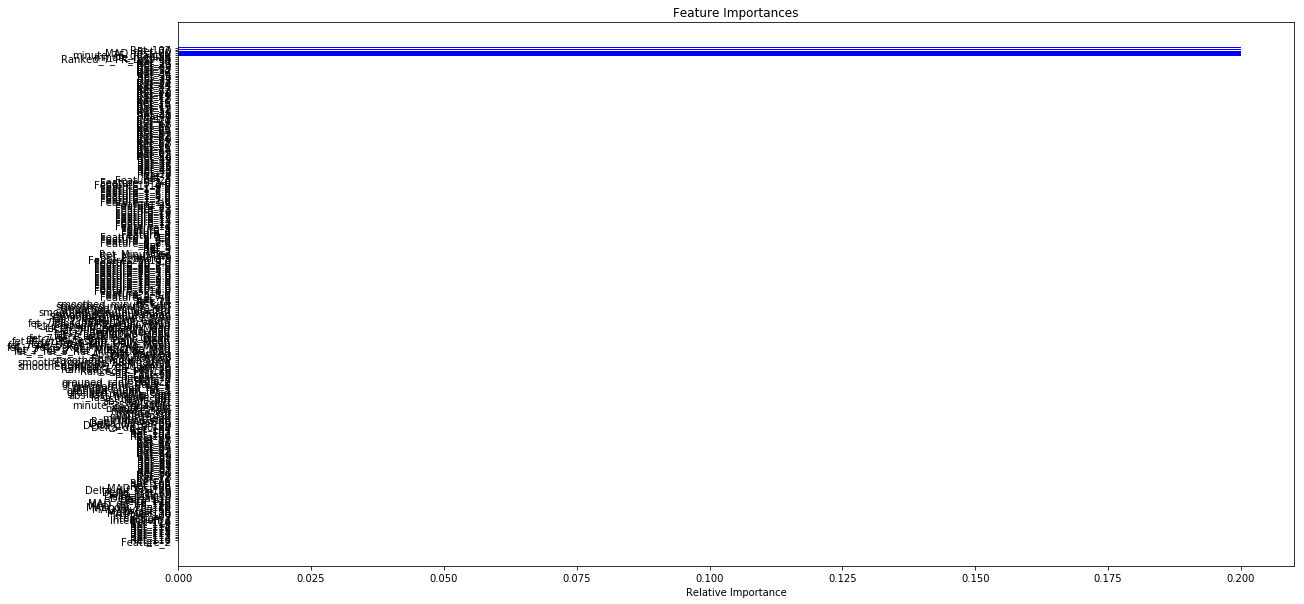

In [28]:
features = np.asarray(X.columns)
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=0.7, verbose=0,
             warm_start=False)
-0.0157798677874649


In [25]:
(np.abs(gs3.predict(X)- y.Ret_PlusOne)*weights.Weight_Daily).mean()

26490.774736931355

In [22]:
low_cut = y.Ret_PlusOne.std()*-4
high_cut = y.Ret_PlusOne.std()*4
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
#param_grid= {'min_samples_leaf ': [3, 5, 10],'max_depth ':[3, 4, 7],'loss':['huber', 'ls']}
param_grid= {'min_samples_leaf': [10],'max_depth':[3, 4],'loss':['huber'],'max_features':['sqrt'],'subsample':[0.7]}
gs2= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs2.fit(X, y.Ret_PlusOne.clip(low_cut,high_cut), groups)
gs2.cv_results_ 
print(gs2.best_estimator_)
print(gs2.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=0.7, verbose=0,
             warm_start=False)
-0.015771329758528508


In [58]:
(np.abs(gs2.predict(X)- y.Ret_PlusOne)*weights.Weight_Daily).mean()

26254.78719855518

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid= {'alpha': [10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700, 1000, 2000]}
lassogs= GridSearchCV(lasso, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
lassogs.fit(X, y.Ret_PlusOne, groups)
lassogs.cv_results_ 
lassogs.best_estimator_
lassogs.best_score_ 

-0.01577046994125336

### Ret_Next_5

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
#param_grid= {'min_samples_leaf ': [3, 5, 10],'max_depth ':[3, 4, 7],'loss':['huber', 'ls']}
param_grid= {'min_samples_leaf': [10],'max_depth':[3, 7],'loss':['huber']}
gs4= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs4.fit(X, y.Ret_Next_5, groups)
gs4.cv_results_ 
print(gs4.best_estimator_)
print(gs4.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
-0.0012274663989273963


In [66]:
gs4.predict(test)

array([-5.17993995e-04, -3.54534530e-05, -7.32509708e-05, ...,
        3.52706468e-05,  9.38495848e-06, -3.02972200e-04])

### Output Section

In [105]:
sample = pd.read_csv('sample_submission_2.csv')
df_train = pd.read_csv('train.csv')
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

(120000, 62)

In [114]:
#grid['Ret_PlusOne'] = gs.predict(test)
for cols in grid.loc[:,'Ret_121':'Ret_125'].columns:
    grid[cols] = ((gs4.predict(test))/5)

#for cols in grid.loc[:,'Ret_126':'Ret_180'].columns:
#    grid[cols] = test.minute_mean.reset_index(drop=True)

In [115]:
grid.head()

,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,...,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo
0,-0.000104,-0.000104,-0.000104,-0.000104,-0.000104,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.000015,-0.000015,-0.000015,-0.000015,-0.000015,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_Next_5_Minute_Mean.csv', index=False)

In [75]:
X.columns.tolist()

['Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_6',
 'Feature_8',
 'Feature_9',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_17',
 'Feature_18',
 'Feature_19',
 'Feature_21',
 'Feature_22',
 'Feature_23',
 'Feature_24',
 'Feature_25',
 'Feature_1_1.0',
 'Feature_1_2.0',
 'Feature_1_3.0',
 'Feature_1_4.0',
 'Feature_1_5.0',
 'Feature_1_6.0',
 'Feature_1_7.0',
 'Feature_1_8.0',
 'Feature_1_9.0',
 'Feature_1_10.0',
 'Feature_5_1.0',
 'Feature_5_2.0',
 'Feature_5_3.0',
 'Feature_5_4.0',
 'Feature_5_5.0',
 'Feature_5_6.0',
 'Feature_5_7.0',
 'Feature_5_8.0',
 'Feature_5_9.0',
 'Feature_5_10.0',
 'Feature_10_1.0',
 'Feature_10_2.0',
 'Feature_10_3.0',
 'Feature_10_4.0',
 'Feature_10_5.0',
 'Feature_10_6.0',
 'Feature_16_0.0',
 'Feature_16_1.0',
 'Feature_20_2.0',
 'Feature_20_3.0',
 'Feature_20_4.0',
 'Feature_20_5.0',
 'Feature_20_6.0',
 'Feature_20_7.0',
 'Feature_20_8.0',
 'Feature_20_9.0',
 'Feature_20_10.0',
 'Feature_5',
 'Ret_MinusTwo',
 'Re

# Best One SO Far
** Do Not Change **
using righe with the most correlating features to predict the next 60 minutes with ridge regression scores only 0.04 worse than the zero benchmark

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cols_to_use =  ['fet_7_diff_RetDaily_Mean', 'fet_7_fet_5_Diff_Daily_Mean',
       'fet_7_RetMinTwo_Mean', 'grouped_mean_fet_7', 'fet_7_RetMinOne_Mean',
       'fet_7_fet_5_Ret_MinusTwo_Mean', 'daily_diff',
       'fet_7_fet_5_Ret_MinusOne_Mean', 'Ret_MinusTwo', 'last_minute_sum', 'PR_Last_10', 'Delta_last_5']

ridge = Ridge()
param_grid= {'alpha': [10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_Next_60, groups)
gs.cv_results_ 
gs.best_estimator_
gs.best_score_ 


-0.004819542640717852

In [133]:
gs.predict(test[cols_to_use])/60

array([-4.71816548e-06, -4.71816548e-06, -4.71816548e-06, ...,
       -4.71816548e-06, -4.71816548e-06, -4.71816548e-06])

In [126]:
sample = pd.read_csv('sample_submission_2.csv')
df_train = pd.read_csv('train.csv')
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

(120000, 62)

In [129]:
for cols in grid.loc[:,'Ret_121':'Ret_125'].columns:
    grid[cols] = ((gs.predict(test[cols_to_use]))/60)

In [131]:
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_Next_60with_ridge.csv', index=False)

### same with lasso
maybe a even higher alpha than 10 could help slightly oder standartisieren

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cols_to_use =  ['fet_7_diff_RetDaily_Mean', 'fet_7_fet_5_Diff_Daily_Mean',
       'fet_7_RetMinTwo_Mean', 'grouped_mean_fet_7', 'fet_7_RetMinOne_Mean',
       'fet_7_fet_5_Ret_MinusTwo_Mean', 'daily_diff',
       'fet_7_fet_5_Ret_MinusOne_Mean', 'Ret_MinusTwo', 'last_minute_sum', 'PR_Last_10', 'Delta_last_5']

lasso = Lasso()
param_grid= {'alpha': [10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700]}
gs_60= GridSearchCV(lasso, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs_60.fit(X[cols_to_use], y.Ret_Next_60, groups)
gs_60.cv_results_ 
gs_60.best_estimator_
gs_60.best_score_ 

#sample = pd.read_csv('sample_submission_2.csv')
df_train = pd.read_csv('train.csv')
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_180'].columns:
    grid[cols] = ((gs_60.predict(test[cols_to_use]))/60)
    
#sample['Predicted'] = grid.values.flatten()
#sample.to_csv('submissions/Ret_Next_60_average_with_lasso.csv', index=False)

### mean prediction
scores pretty shitty i dont know what i submitted last time when mean prediction scored better than zeros

In [144]:
df_train = pd.read_csv('train.csv')
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_180'].columns:
    grid[cols] = test.minute_mean.reset_index(drop=True)
grid.head()    
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/minute_mean_prediction.csv', index=False)

### 90% Lasso 10% Mean

In [146]:
df_train = pd.read_csv('train.csv')
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_125'].columns:
    grid[cols] = ((gs.predict(test[cols_to_use]))/60)*0.95+ test.minute_mean.reset_index(drop=True)*0.05
    sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/lasso_Next_60_Mean_Blend.csv', index=False)

### Lasso for next 10

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cols_to_use =  ['Ranked_7_PR_Last_30', 'Ranked_7_PR_Last_60' ,'Ranked_7_PR_Last_10', 'Ranked_7_PR_120',
'Ranked_7_PR_Last_5',
'daily_sum',
'PR_Last_30',
'Ret_MinusOne',
'fet_7_RetMinTwo_Mean',
'Ret_MinusTwo',
'PR_Last_10',
'MAD_dif_60_120',
]

lasso = Lasso()
param_grid= {'alpha': [10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(lasso, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_Next_10, groups)
gs.cv_results_ 
gs.best_estimator_
gs.best_score_ 

grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_130'].columns:
    grid[cols] = ((gs.predict(test[cols_to_use]))/10)
    
#sample['Predicted'] = grid.values.flatten()
#sample.to_csv('submissions/Ret_Next_10with_lasso.csv', index=False)

In [154]:


gbm = GradientBoostingRegressor()
#param_grid= {'min_samples_leaf ': [3, 5, 10],'max_depth ':[3, 4, 7],'loss':['huber', 'ls']}
param_grid= {'loss':['huber', 'ls'], 'max_features':['sqrt']}
gs4= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs4.fit(X, y.Ret_Next_10, groups)
gs4.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [167]:
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

cols_to_use_2 =  ['fet_7_diff_RetDaily_Mean', 'fet_7_fet_5_Diff_Daily_Mean',
       'fet_7_RetMinTwo_Mean', 'grouped_mean_fet_7', 'fet_7_RetMinOne_Mean',
       'fet_7_fet_5_Ret_MinusTwo_Mean', 'daily_diff',
       'fet_7_fet_5_Ret_MinusOne_Mean', 'Ret_MinusTwo', 'last_minute_sum', 'PR_Last_10', 'Delta_last_5']

for cols in grid.loc[:,'Ret_121':'Ret_130'].columns:
    grid[cols] = ((gs_60.predict(test[cols_to_use_2]))/60)*0.3+0.7*((gs.predict(test[cols_to_use]))/10)
    
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_Next_10with_lasso_lasso_blend.csv', index=False)

 Lasso with most correlating Features and predicting Ret_PlusOne

In [190]:
######## Beating the Zero Benchline ####
cols_to_use=['Delta_last_5', 
'smoothed_minute_sum',
'smoothed_minute_mean',
'inteaction_1', 
'PR_Last_10', 
'Delta_119', 
'PR_120',
'minute_mean', 
'Delta_120',
'minute_sum',
'Delta_last_60',
'fet_7_absdiff_RetDaily_Mad', 
'PR_Last_60', 
'Delta_dif_10_120', 
'Diff_Ranked',
'Delta_last_10', 
'inteaction_2', 
'grouped_rank_daily_2', 
'Rank_MinusTwo',
'PR_Last_30']

ridge = Ridge()
param_grid= {'alpha': [100, 10,7 ,5],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusOne, groups)
gs.cv_results_ 
gs.best_estimator_
gs.best_score_ 

grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs.predict(test[cols_to_use])))
### apparently im not using the values i got but values blended with constant of 0.1 ## don't know if it's still actual or if this explaines the 'worser' ridge submission
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_ridge_1.csv', index=False)

In [178]:
gs.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [182]:
low_cut = y.Ret_PlusOne.std()*-4
high_cut = y.Ret_PlusOne.std()*4
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
#param_grid= {'min_samples_leaf ': [3, 5, 10],'max_depth ':[3, 4, 7],'loss':['huber', 'ls']}
param_grid= {'n_estimators': [500], 'min_samples_leaf': [10],'max_depth':[4],'loss':['ls'],'max_features':['auto'],'subsample':[0.7]}
gs3= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs3.fit(X[cols_to_use], y.Ret_PlusOne.clip(low_cut,high_cut), groups)
gs3.cv_results_ 
print(gs3.best_estimator_)
print(gs3.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=0.7, verbose=0,
             warm_start=False)
-0.016351721042004202


In [183]:
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs3.predict(test[cols_to_use]))/10)

sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_GBM_500_clipped.csv', index=False)

Mean Prediction for Daily


In [187]:
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = test.Ret_MinusOne.mean()
### apparently im not using the values i got but values blended with constant of 0.1
#sample['Predicted'] = grid.values.flatten()
#sample.to_csv('submissions/Ret_PlusOne_mean.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'Ret_PlusOne'

In [16]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()

cols_to_use=['Delta_last_5', 
'smoothed_minute_sum',
'smoothed_minute_mean',
'inteaction_1', 
'PR_Last_10', 
'Delta_119', 
'PR_120',
'minute_mean', 
'Delta_120',
'minute_sum',
'Delta_last_60',
'fet_7_absdiff_RetDaily_Mad', 
'PR_Last_60', 
'Delta_dif_10_120', 
'Diff_Ranked',
'Delta_last_10', 
'inteaction_2', 
'grouped_rank_daily_2', 
'Rank_MinusTwo',
'PR_Last_30']

param_grid= {'alpha': [100, 10,7 ,5, 0.1, 0], 'epsilon':[1, 1.35, 1.5, 1.75, 1.9],'max_iter':[700]}
gs= GridSearchCV(huber, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusOne, groups)
gs.cv_results_ 
gs.best_estimator_
gs.best_score_ 


-0.015746394096349

In [17]:
gs.best_estimator_

HuberRegressor(alpha=100, epsilon=1, fit_intercept=True, max_iter=700,
        tol=1e-05, warm_start=False)

In [195]:
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs.predict(test[cols_to_use])))
### apparently im not using the values i got but values blended with constant of 0.1
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_huber_1.csv', index=False)

In [192]:
huber.get_params().keys()

dict_keys(['alpha', 'epsilon', 'fit_intercept', 'max_iter', 'tol', 'warm_start'])